This notebook is designed as one's first machine learning experiment. We will load and visualize a dataset of human heights and weights, and use a simple model to predict weight from height.

**After you've read, run, and understood the code, try to modify it as follows:**
* Easy: predict height from weight
* Easy: Add data normalization using a sklearn StandardScaler, as you learned in [the previous tutorial](DataAndTensors.ipynb). This should make optimization much faster because the initial neural network parameters are closer to optimal. **It's a good rule of thumb that a neural network's inputs should have approximately zero mean and unit standard deviation.**
* Harder: Test how using a too complex network for simple data can lead to overfitting and nonsensical predictions. Use data normalization as above and only the 50 first datapoints of the dataset. Use a network with two 32-neuron ReLU layers. You can add the first layer as ```model.add(keras.layers.Dense(32,activation="relu",input_shape=(1,)))``` and the next layers similarly, but without specifying the input_shape, which Keras can figure out by itself.

Model solutions are provided in the same folder, but first try to solve the problem yourself, at least for a few minutes. *Think of this as a puzzle game with optional hints that you will check only if you have to.*

Let's start by including the basic utilities. Now, we also need tensorflow in addition to numpy and pyplot. We also import Keras because it makes building and training basic neural networks easy.

For a bit more complex but similar example, see https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" #disable Tensorflow GPU usage, a simple example like this runs faster on CPU
import tensorflow as tf
from tensorflow import keras  
from sklearn.preprocessing import StandardScaler

Next we load the data and convert to metric system, similar to the previous tutorial.

Text(0, 0.5, 'Weight (kilograms)')

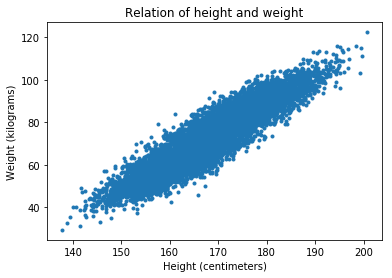

In [2]:
data=np.loadtxt("../Datasets/weight-height.csv",skiprows=1,usecols=(1,2),delimiter=",")
data[:,0]*=2.54
data[:,1]*=0.45359237
pp.scatter(data[:,0],data[:,1],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")

To predict weight from height, we're going to need a machine learning model. We will first train a single-neuron network, i.e., a simple linear model. 

In [11]:
#keras.Sequential makes it easy to compose a neural network models out of layers
model = keras.Sequential()

#Add a 1-neuron layer with linear activation, taking one input value. 
#The input_shape=(1,) defines that there's only a single input value, but batch size is yet unknown.
#Note that this notation is a bit misleading, as the batch data index dimension is really the first one and not the second one.  
#Fortunately, the input_shape needs to only be specified for the first layer
model.add(keras.layers.Dense(1,input_shape=(1,)))

#Make the model ready for optimization using Adam optimizer (the usual reasonable first guess).
#The loss parameter defines the loss function that optimization tries to minimize, in this case
#the mean squared error between the network outputs and actual data values.
#The lr parameter is the "learning rate". With this simple model, we can use a high learning rate of 0.1,
#whereas many complex networks require 0.001 or even 0.0001. This makes training more stable but also more slow.
model.compile(optimizer=keras.optimizers.Adam(lr=0.1),loss="mean_squared_error")

#Define our training inputs and outputs. Our network takes in height (column 0 in the data) and outputs weight (column 1).
trainingInputs=data[:,0]
trainingOutputs=data[:,1]

#Reshape the tensors: This is needed because Tensorflow and Keras models expect to get data in batches, as specified above.
trainingInputs=np.reshape(trainingInputs,[trainingInputs.shape[0],1])
trainingOutputs=np.reshape(trainingOutputs,[trainingOutputs.shape[0],1])

#Fit (train) the model. Epochs defines how many times the network will see all data during the training.
model.fit(trainingInputs,trainingOutputs,verbose=1,epochs=5)


Epoch 1/5
10000/10000 [==============================] - 0s 38us/step - loss: 122.9542
Epoch 2/5
10000/10000 [==============================] - 0s 23us/step - loss: 115.5762
Epoch 3/5
10000/10000 [==============================] - 0s 23us/step - loss: 112.9100

Now, let's plot the data again, adding the model predictions.

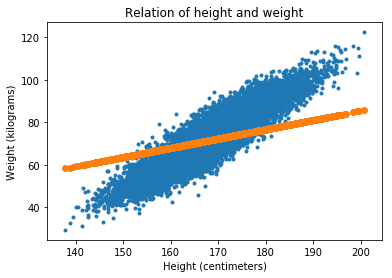

In [4]:
pp.figure(1)
#pp.scatter(data[:,0],data[:,1],marker=".")
pp.scatter(trainingInputs[:,0],trainingOutputs[:,0],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")
predictions=model.predict(trainingInputs)
#NOTE: The predictions is of the same shape as trainingOutputs, i.e., [10000,1]
#scatter() expects 1-dimensional x and y arrays; thus, we need to use the [:,0] and [:,1] indexing.
pp.scatter(trainingInputs[:,0],predictions[:,0])

What you should see above is a line that predicts growing weight with growing height, but it does not yet fit the data really well. However, the fit gets better when the training continues. Below, we optimize for 50 more epochs and then visualize again. 

Epoch 1/10
 - 0s - loss: 96.9430
Epoch 2/10
 - 0s - loss: 95.9340
Epoch 3/10
 - 0s - loss: 91.5169
Epoch 4/10
 - 0s - loss: 89.2675
Epoch 5/10
 - 0s - loss: 85.9650
Epoch 6/10
 - 0s - loss: 83.7058
Epoch 7/10
 - 0s - loss: 78.7456
Epoch 8/10
 - 0s - loss: 77.6399
Epoch 9/10
 - 0s - loss: 76.0174
Epoch 10/10
 - 0s - loss: 70.2956
Epoch 1/10
 - 0s - loss: 74.0406
Epoch 2/10
 - 0s - loss: 66.3107
Epoch 3/10
 - 0s - loss: 65.0503
Epoch 4/10
 - 0s - loss: 61.1227
Epoch 5/10
 - 0s - loss: 61.7768
Epoch 6/10
 - 0s - loss: 57.3551
Epoch 7/10
 - 0s - loss: 58.4772
Epoch 8/10
 - 0s - loss: 57.7403
Epoch 9/10
 - 0s - loss: 57.0387
Epoch 10/10
 - 0s - loss: 53.0833
Epoch 1/10
 - 0s - loss: 50.7564
Epoch 2/10
 - 0s - loss: 50.0433
Epoch 3/10
 - 0s - loss: 49.2424
Epoch 4/10
 - 0s - loss: 47.4202
Epoch 5/10
 - 0s - loss: 46.8355
Epoch 6/10
 - 0s - loss: 45.3933
Epoch 7/10
 - 0s - loss: 45.7350
Epoch 8/10
 - 0s - loss: 45.5046
Epoch 9/10
 - 0s - loss: 47.6724
Epoch 10/10
 - 0s - loss: 42.1390
Epoch 1

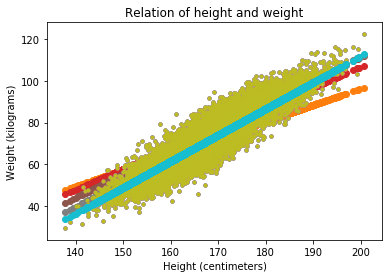

In [12]:
#fit the model
model.fit(trainingInputs,trainingOutputs,verbose=2,epochs=50)  

#visualize the data
pp.figure(1)
pp.scatter(data[:,0],data[:,1],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")
predictions=model.predict(trainingInputs)
pp.scatter(trainingInputs[:,0],predictions[:,0])

Now, it's easy to query the model with any height values:

In [9]:
print("The predicted weight for a person who weighs 200kg is ",model.predict([[200]])[0,0])

The predicted weight for a person who weighs 200kg is  104.03264


Note that above, we had to use [[200]], because we only had one value to predict but the network wants a 2D tensor as input. [[200]] defines an array of shape [1,1] with the only element having indices [0,0] and value 200. Similarly, the prediction is a [1,1] shaped tensor, which we query with indices [0,0].

**Unfortunately, this tensor indexing mess is one of the biggest hurdles in getting into ML coding. Don't worry, it's hard for everyone at first. Once you've wrapped your head around it, things will get much easier.**

This simple data can be modeled using a 1-layer network without any nonlinear activation functions. Out of curiosity, let's see what happens when we use a multilayer network with ReLU activations. To see things in more detail, we also only use the first 50 data points.

In [13]:
data=data[:50]
data-=np.mean(data,axis=0)
data/=np.std(data,axis=0)
model = keras.Sequential()
#add a layer with 32 ReLU neurons
model.add(keras.layers.Dense(32,activation="relu",input_shape=(1,)))
#add a layer with 32 ReLU neurons
model.add(keras.layers.Dense(32,activation="relu"))
#NOTE: we don't need to specify input_shape for others than the first layer. Keras can deduce it automatically.
#add the output layer (1 neuron because only 1 predicted value)
model.add(keras.layers.Dense(1))
model.compile(optimizer=keras.optimizers.Adam(lr=0.1),loss="mean_squared_error")

#Define our training inputs and outputs. Our network takes in height (column 0 in the data) and outputs weight (column 1).
trainingInputs=data[:,0]
trainingOutputs=data[:,1]

#Reshape the tensors: This is needed because Tensorflow and Keras models expect to get data in batches, as specified above.
trainingInputs=np.reshape(trainingInputs,[trainingInputs.shape[0],1])
trainingOutputs=np.reshape(trainingOutputs,[trainingOutputs.shape[0],1])

#Fit the model. Epochs defines how many times the network will see all data during the training.
model.fit(trainingInputs,trainingOutputs,verbose=2,epochs=100)


Epoch 1/100
 - 0s - loss: 0.6935
Epoch 2/100
 - 0s - loss: 0.4237
Epoch 3/100
 - 0s - loss: 0.4380
Epoch 4/100
 - 0s - loss: 0.5636
Epoch 5/100
 - 0s - loss: 0.3572
Epoch 6/100
 - 0s - loss: 0.4825
Epoch 7/100
 - 0s - loss: 0.3293
Epoch 8/100
 - 0s - loss: 0.3458
Epoch 9/100
 - 0s - loss: 0.2945
Epoch 10/100
 - 0s - loss: 0.2762
Epoch 11/100
 - 0s - loss: 0.3964
Epoch 12/100
 - 0s - loss: 0.2648
Epoch 13/100
 - 0s - loss: 0.3498
Epoch 14/100
 - 0s - loss: 0.2829
Epoch 15/100
 - 0s - loss: 0.2939
Epoch 16/100
 - 0s - loss: 0.3133
Epoch 17/100
 - 0s - loss: 0.2683
Epoch 18/100
 - 0s - loss: 0.2817
Epoch 19/100
 - 0s - loss: 0.2977
Epoch 20/100
 - 0s - loss: 0.2774
Epoch 21/100
 - 0s - loss: 0.2619
Epoch 22/100
 - 0s - loss: 0.2892
Epoch 23/100
 - 0s - loss: 0.2460
Epoch 24/100
 - 0s - loss: 0.2974
Epoch 25/100
 - 0s - loss: 0.2600
Epoch 26/100
 - 0s - loss: 0.2776
Epoch 27/100
 - 0s - loss: 0.2737
Epoch 28/100
 - 0s - loss: 0.2502
Epoch 29/100
 - 0s - loss: 0.3058
Epoch 30/100
 - 0s - lo

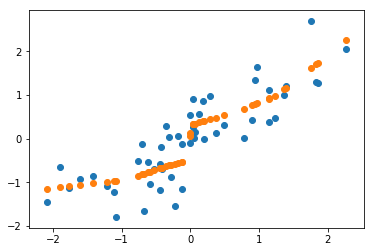

In [14]:
#Scatterplot both the data and the predictions
pp.scatter(trainingInputs,trainingOutputs)
predictions=model.predict(trainingInputs)
pp.scatter(trainingInputs,predictions)